In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print(cv2.__version__)

4.2.0


In [2]:
img = cv2.imread('fox.jpg', -1)
print(type(img))
print(img.shape)


<class 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'shape'

## Ex. 1: Finding redish areas using an HSV-inRange check

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
red = np.uint8([[[0,0,255]]])
red_hsv = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
print(red_hsv)

[[[  0 255 255]]]


In [4]:
lower_red = np.array([-15,100,100])
upper_red = np.array([15,255,255])
mask = cv2.inRange(hsv, lower_red, upper_red)
mask_applied = cv2.bitwise_and(img, img, mask=mask)

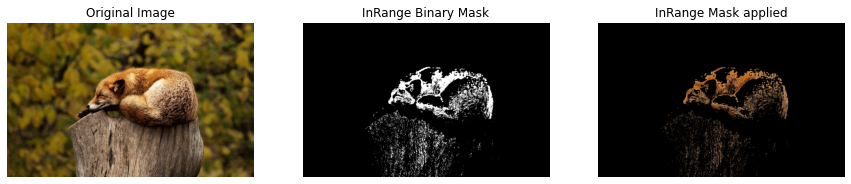

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis("off")
plt.subplot(132), plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)), plt.title('InRange Binary Mask'), plt.axis("off")
plt.subplot(133), plt.imshow(cv2.cvtColor(mask_applied, cv2.COLOR_BGR2RGB)), plt.title('InRange Mask applied'), plt.axis("off")
plt.show()

## Ex. 1: Finding redish areas using threshold

In [6]:
ret, thres_img = cv2.threshold(img[:,:,2], 170, 255, cv2.THRESH_BINARY)
mask_2_applied = cv2.bitwise_and(img, img, mask=thres_img)

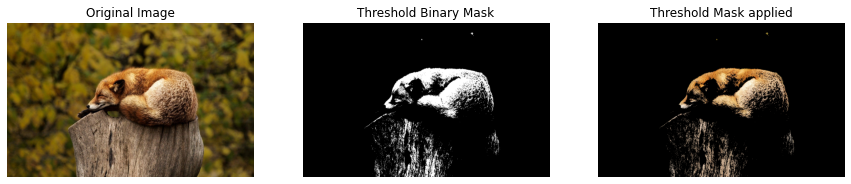

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis("off")
plt.subplot(132), plt.imshow(cv2.cvtColor(thres_img, cv2.COLOR_BGR2RGB)), plt.title('Threshold Binary Mask'), plt.axis("off")
plt.subplot(133), plt.imshow(cv2.cvtColor(mask_2_applied, cv2.COLOR_BGR2RGB)), plt.title('Threshold Mask applied'), plt.axis("off")
plt.show()

## Ex. 1: Contours

In [10]:
contour_overlay = np.copy(img)
contours, hierarchy = cv2.findContours(thres_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_overlay, contours, -1, (0,255,0), 3);

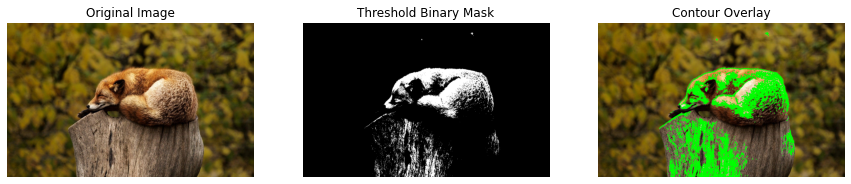

In [11]:
#%matplotlib qt
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis("off")
plt.subplot(132), plt.imshow(cv2.cvtColor(thres_img, cv2.COLOR_BGR2RGB)), plt.title('Threshold Binary Mask'), plt.axis("off")
plt.subplot(133), plt.imshow(cv2.cvtColor(contour_overlay, cv2.COLOR_BGR2RGB)), plt.title('Contour Overlay'), plt.axis("off")
plt.show()

## Ex. 1: Different Mode & Method, only long contour vectors

In [12]:
contour_overlay = np.copy(img)
contours, hierarchy = cv2.findContours(thres_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
long_contours = np.array([i for i in contours if len(i) > 100])
print(len(long_contours))
cv2.drawContours(contour_overlay, long_contours, -1, (0,255,0), 3);

32


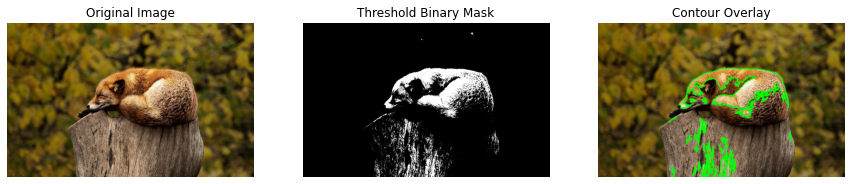

In [13]:
#%matplotlib qt
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis("off")
plt.subplot(132), plt.imshow(cv2.cvtColor(thres_img, cv2.COLOR_BGR2RGB)), plt.title('Threshold Binary Mask'), plt.axis("off")
plt.subplot(133), plt.imshow(cv2.cvtColor(contour_overlay, cv2.COLOR_BGR2RGB)), plt.title('Contour Overlay'), plt.axis("off")
plt.show()

## Other contour features

In [14]:
hull = []
for i in range(len(contours)):
    new_hull = cv2.convexHull(contours[i])
    if new_hull.shape[0] > 20:
        print(i)
        hull.append(new_hull)
    #hull.append(cv2.convexHull(contours[i]))
print(len(hull))
for i,j in enumerate(hull):
    cv2.drawContours(contour_overlay, hull, i, (255, 0, 0), 10, 8)

2203
1


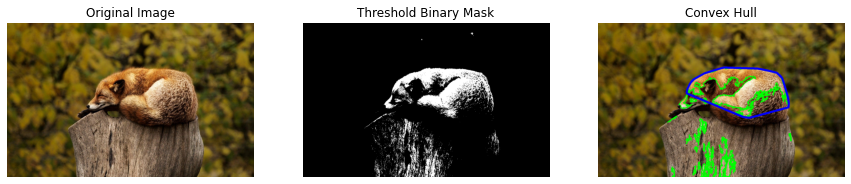

In [15]:
#%matplotlib qt
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis("off")
plt.subplot(132), plt.imshow(cv2.cvtColor(thres_img, cv2.COLOR_BGR2RGB)), plt.title('Threshold Binary Mask'), plt.axis("off")
plt.subplot(133), plt.imshow(cv2.cvtColor(contour_overlay, cv2.COLOR_BGR2RGB)), plt.title('Convex Hull'), plt.axis("off")
plt.show()

In [16]:
body_contour = contours[2203]
x,y,w,h = cv2.boundingRect(body_contour)
rect_img = np.copy(img)
cv2.rectangle(rect_img,(x,y), (x+w, y+h), (0, 255,0), 5);

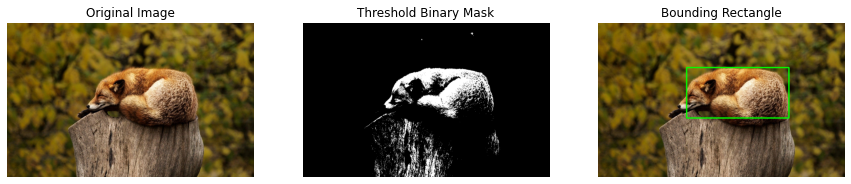

In [17]:
#%matplotlib qt
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis("off")
plt.subplot(132), plt.imshow(cv2.cvtColor(thres_img, cv2.COLOR_BGR2RGB)), plt.title('Threshold Binary Mask'), plt.axis("off")
plt.subplot(133), plt.imshow(cv2.cvtColor(rect_img, cv2.COLOR_BGR2RGB)), plt.title('Bounding Rectangle'), plt.axis("off")
plt.show()

## Ex. 2: Background subtraction, simulated camera

In [18]:
import sys
sys.path.append('../../build')
import libry as ry
import time 
import cv2
import numpy as np

In [19]:
V = 0
S = 0
#-- Add REAL WORLD configuration and camera
RealWorld = ry.Config()
RealWorld.addFile("../../scenarios/challenge.g")
S = RealWorld.simulation(ry.SimulatorEngine.physx, True)
S.addSensor("camera")

C = ry.Config()
C.addFile('../../scenarios/pandasTable.g')
V = ry.ConfigurationViewer()
V.setConfiguration(C)
cameraFrame = C.frame("camera")

#the focal length
f = 0.895
f = f * 360.
#the relative pose of the camera
# pcl.setRelativePose('d(-90 0 0 1) t(-.08 .205 .115) d(26 1 0 0) d(-1 0 1 0) d(6 0 0 1) ')
fxfypxpy = [f, f, 320., 180.]

points = []
tau = .01

[start_rgb, start_depth] = S.getImageAndDepth()
start_gray = cv2.cvtColor(start_rgb, cv2.COLOR_BGR2GRAY)
cv2.imshow('Starting image', start_gray)

for t in range(500):
    time.sleep(0.01)
    
    q = S.get_q()
    if t%10 == 0:
        [rgb, depth] = S.getImageAndDepth() 
        gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
        points = S.depthData2pointCloud(depth, fxfypxpy)
        cameraFrame.setPointCloud(points, rgb)
        V.recopyMeshes(C)
        V.setConfiguration(C)
        
        background_diff = abs(start_gray - gray)
        ret_2, thres_bin = cv2.threshold(background_diff, 0, 255, cv2.THRESH_BINARY)
        
        contours_sim, hierarchy_sim = cv2.findContours(thres_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(rgb, contours_sim, -1, (0,255,0), 3);
        
            
        if len(thres_bin)>0: cv2.imshow('OPENCV - Pixel Changes - Binary', thres_bin)
        if len(rgb)>0: cv2.imshow('OPENCV - rgb with contours', rgb)
        #if len(depth)>0: cv2.imshow('OPENCV - depth', 0.5* depth)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    S.step([], tau, ry.ControlMode.none)
    
cv2.destroyAllWindows()    


## Same pipeline, blurred input

In [20]:
blurring_kernel = np.ones((5,5), np.float32)/25


In [21]:
kernel_to_use = blurring_kernel


V = 0
S = 0
#-- Add REAL WORLD configuration and camera
RealWorld = ry.Config()
RealWorld.addFile("../../scenarios/challenge.g")
S = RealWorld.simulation(ry.SimulatorEngine.physx, True)
S.addSensor("camera")

C = ry.Config()
C.addFile('../../scenarios/pandasTable.g')
V = ry.ConfigurationViewer()
V.setConfiguration(C)
cameraFrame = C.frame("camera")

#the focal length
f = 0.895
f = f * 360.
#the relative pose of the camera
# pcl.setRelativePose('d(-90 0 0 1) t(-.08 .205 .115) d(26 1 0 0) d(-1 0 1 0) d(6 0 0 1) ')
fxfypxpy = [f, f, 320., 180.]

points = []
tau = .01

[start_rgb, start_depth] = S.getImageAndDepth()
start_rgb_filtered = cv2.filter2D(start_rgb, -1, kernel_to_use)

start_gray = cv2.cvtColor(start_rgb_filtered, cv2.COLOR_BGR2GRAY)
cv2.imshow('Starting image', start_gray)

for t in range(500):
    time.sleep(0.01)
    
    q = S.get_q()
    if t%10 == 0:
        [rgb, depth] = S.getImageAndDepth() 
        rgb_filtered = cv2.filter2D(rgb, -1, kernel_to_use)
        if len(rgb_filtered)>0: cv2.imshow('OPENCV - Filtered RGB Image', rgb_filtered)
        gray = cv2.cvtColor(rgb_filtered, cv2.COLOR_BGR2GRAY)
        points = S.depthData2pointCloud(depth, fxfypxpy)
        cameraFrame.setPointCloud(points, rgb)
        V.recopyMeshes(C)
        V.setConfiguration(C)
        
        background_diff = abs(start_gray - gray)
        ret_2, thres_bin = cv2.threshold(background_diff, 0, 255, cv2.THRESH_BINARY)
        
        contours_sim, hierarchy_sim = cv2.findContours(thres_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(rgb, contours_sim, -1, (0,255,0), 3);
        
            
        if len(thres_bin)>0: cv2.imshow('OPENCV - Pixel Changes - Binary', thres_bin)
        if len(rgb)>0: cv2.imshow('OPENCV - rgb with contours', rgb)
        #if len(depth)>0: cv2.imshow('OPENCV - depth', 0.5* depth)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    S.step([], tau, ry.ControlMode.none)
    
cv2.destroyAllWindows()    